In [16]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
%matplotlib inline
import statsmodels.formula.api as smf

In [3]:
location="ks-projects-201801.csv"
df=pd.read_csv(location)
df.head()

,ID,name,category,main_category,currency,deadline,goal,launched,pledged,state,backers,country,usd pledged,usd_pledged_real,usd_goal_real
0,1000002330,The Songs of Adelaide & Abullah,Poetry,Publishing,GBP,2015-10-09,1000.0,2015-08-11 12:12:28,0.0,failed,0,GB,0.0,0.0,1533.95
1,1000003930,Greeting From Earth: ZGAC Arts Capsule For ET,Narrative Film,Film & Video,USD,2017-11-01,30000.0,2017-09-02 04:43:57,2421.0,failed,15,US,100.0,2421.0,30000.00
2,1000004038,Where is Hank?,Narrative Film,Film & Video,USD,2013-02-26,45000.0,2013-01-12 00:20:50,220.0,failed,3,US,220.0,220.0,45000.00
3,1000007540,ToshiCapital Rekordz Needs Help to Complete Album,Music,Music,USD,2012-04-16,5000.0,2012-03-17 03:24:11,1.0,failed,1,US,1.0,1.0,5000.00
4,1000011046,Community Film Project: The Art of Neighborhoo...,Film & Video,Film & Video,USD,2015-08-29,19500.0,2015-07-04 08:35:03,1283.0,canceled,14,US,1283.0,1283.0,19500.00


In [4]:
df.columns


Index(['ID', 'name', 'category', 'main_category', 'currency', 'deadline',
       'goal', 'launched', 'pledged', 'state', 'backers', 'country',
       'usd pledged', 'usd_pledged_real', 'usd_goal_real'],
      dtype='object')

In [5]:
df.count()

ID                  378661
name                378657
category            378661
main_category       378661
currency            378661
deadline            378661
goal                378661
launched            378661
pledged             378661
state               378661
backers             378661
country             378661
usd pledged         374864
usd_pledged_real    378661
usd_goal_real       378661
dtype: int64

In [6]:
df.describe()

,ID,goal,pledged,backers,usd pledged,usd_pledged_real,usd_goal_real
count,3.786610e+05,3.786610e+05,3.786610e+05,378661.000000,3.748640e+05,3.786610e+05,3.786610e+05
mean,1.074731e+09,4.908079e+04,9.682979e+03,105.617476,7.036729e+03,9.058924e+03,4.545440e+04
std,6.190862e+08,1.183391e+06,9.563601e+04,907.185035,7.863975e+04,9.097334e+04,1.152950e+06
min,5.971000e+03,1.000000e-02,0.000000e+00,0.000000,0.000000e+00,0.000000e+00,1.000000e-02
25%,5.382635e+08,2.000000e+03,3.000000e+01,2.000000,1.698000e+01,3.100000e+01,2.000000e+03
50%,1.075276e+09,5.200000e+03,6.200000e+02,12.000000,3.947200e+02,6.243300e+02,5.500000e+03
75%,1.610149e+09,1.600000e+04,4.076000e+03,56.000000,3.034090e+03,4.050000e+03,1.550000e+04
max,2.147476e+09,1.000000e+08,2.033899e+07,219382.000000,2.033899e+07,2.033899e+07,1.663614e+08


In [7]:
dupe=df.duplicated()
df[dupe]
df.drop_duplicates()

,ID,name,category,main_category,currency,deadline,goal,launched,pledged,state,backers,country,usd pledged,usd_pledged_real,usd_goal_real
0,1000002330,The Songs of Adelaide & Abullah,Poetry,Publishing,GBP,2015-10-09,1000.0,2015-08-11 12:12:28,0.00,failed,0,GB,0.00,0.00,1533.95
1,1000003930,Greeting From Earth: ZGAC Arts Capsule For ET,Narrative Film,Film & Video,USD,2017-11-01,30000.0,2017-09-02 04:43:57,2421.00,failed,15,US,100.00,2421.00,30000.00
2,1000004038,Where is Hank?,Narrative Film,Film & Video,USD,2013-02-26,45000.0,2013-01-12 00:20:50,220.00,failed,3,US,220.00,220.00,45000.00
3,1000007540,ToshiCapital Rekordz Needs Help to Complete Album,Music,Music,USD,2012-04-16,5000.0,2012-03-17 03:24:11,1.00,failed,1,US,1.00,1.00,5000.00
4,1000011046,Community Film Project: The Art of Neighborhoo...,Film & Video,Film & Video,USD,2015-08-29,19500.0,2015-07-04 08:35:03,1283.00,canceled,14,US,1283.00,1283.00,19500.00
5,1000014025,Monarch Espresso Bar,Restaurants,Food,USD,2016-04-01,50000.0,2016-02-26 13:38:27,52375.00,successful,224,US,52375.00,52375.00,50000.00
6,1000023410,Support Solar Roasted Coffee & Green Energy! ...,Food,Food,USD,2014-12-21,1000.0,2014-12-01 18:30:44,1205.00,successful,16,US,1205.00,1205.00,1000.00
7,1000030581,Chaser Strips. Our Strips make Shots their B*tch!,Drinks,Food,USD,2016-03-17,25000.0,2016-02-01 20:05:12,453.00,failed,40,US,453.00,453.00,25000.00
8,1000034518,SPIN - Premium Retractable In-Ear Headphones w...,Product Design,Design,USD,2014-05-29,125000.0,2014-04-24 18:14:43,8233.00,canceled,58,US,8233.00,8233.00,125000.00
9,100004195,STUDIO IN THE SKY - A Documentary Feature Film...,Documentary,Film & Video,USD,2014-08-10,65000.0,2014-07-11 21:55:48,6240.57,canceled,43,US,6240.57,6240.57,65000.00


In [57]:
def state(x):
    if x=='successful':
        return 5
    elif x=='live':
        return 4
    elif x=='undefined':
        return 3
    elif x=='canceled':
        return 2
    elif x=='suspended':
        return 1
    else:
        return 0
df['state_new']= df['state'].apply(state)  
df.tail()
    

,ID,name,category,main_category,currency,deadline,goal,launched,pledged,state,backers,country,usd pledged,usd_pledged_real,usd_goal_real,state_new,country_new
378656,999976400,ChknTruk Nationwide Charity Drive 2014 (Canceled),Documentary,Film & Video,USD,2014-10-17,50000.0,2014-09-17 02:35:30,25.0,canceled,1,US,25.0,25.0,50000.0,2,1
378657,999977640,The Tribe,Narrative Film,Film & Video,USD,2011-07-19,1500.0,2011-06-22 03:35:14,155.0,failed,5,US,155.0,155.0,1500.0,0,1
378658,999986353,Walls of Remedy- New lesbian Romantic Comedy f...,Narrative Film,Film & Video,USD,2010-08-16,15000.0,2010-07-01 19:40:30,20.0,failed,1,US,20.0,20.0,15000.0,0,1
378659,999987933,BioDefense Education Kit,Technology,Technology,USD,2016-02-13,15000.0,2016-01-13 18:13:53,200.0,failed,6,US,200.0,200.0,15000.0,0,1
378660,999988282,Nou Renmen Ayiti! We Love Haiti!,Performance Art,Art,USD,2011-08-16,2000.0,2011-07-19 09:07:47,524.0,failed,17,US,524.0,524.0,2000.0,0,1


In [119]:
df.to_csv('my_ks-projects-201801.csv')

In [100]:
df.groupby(['main_category', 'state']).mean()

ID          goal       pledged  \
main_category state                                                  
Art           canceled    1.097045e+09  4.322802e+04    587.969302   
              failed      1.071770e+09  7.046241e+04    657.647179   
              live        1.147005e+09  1.735378e+04   2526.978763   
              successful  1.079846e+09  4.642114e+03   7836.474882   
              suspended   1.131164e+09  9.474500e+03   2700.914583   
Comics        canceled    1.084159e+09  1.398976e+04    927.542530   
              failed      1.066217e+09  4.286972e+04   1024.505404   
              live        9.723505e+08  6.528539e+03   2394.417763   
              successful  1.059403e+09  5.693608e+03  11902.964118   
              suspended   1.224591e+09  1.983591e+04    376.565217   
Crafts        canceled    1.104318e+09  1.653216e+04    426.717568   
              failed      1.075722e+09  1.377065e+04    416.516462   
              live        1.007641e+09  1.178999e+04   1541.080395   
              successful  1.077424e+09  3.539476e+03   7022.015139   
              suspended   1.105994e+09  1.755262e+04    784.718056   
Dance         canceled    1.067723e+09  3.625533e+04    540.366564   
              failed      1.066526e+09  1.668155e+04    663.784089   
              live        1.054220e+09  1.154722e+04    906.277778   
              successful  1.079357e+09  4.941846e+03   5550.954380   
              suspended   1.298578e+09  4.442692e+04    340.923077   
              undefined   1.704012e+09  4.000000e+04    200.000000   
Design        canceled    1.071301e+09  7.388997e+04   5107.254976   
              failed      1.078069e+09  5.997636e+04   3297.468938   
              live        1.114504e+09  4.551965e+04  30761.514852   
              successful  1.079661e+09  1.786936e+04  69272.926059   
              suspended   1.104854e+09  3.048197e+04  21146.965587   
              undefined   1.343584e+09  3.250000e+04    980.500000   
Fashion       canceled    1.073428e+09  2.880981e+04   1762.204653   
              failed      1.070605e+09  2.979921e+04    947.532861   
              live        1.048983e+09  2.683822e+04   3514.929800   
...                                ...           ...           ...   
Music         canceled    1.077491e+09  3.557309e+04    894.838269   
              failed      1.074225e+09  2.502869e+04    661.171053   
              live        1.097872e+09  4.813055e+04   3421.704057   
              successful  1.074948e+09  5.928511e+03   7543.683579   
              suspended   1.075541e+09  3.495768e+04    625.359866   
              undefined   1.076395e+09  4.223450e+03   2849.787243   
Photography   canceled    1.067815e+09  2.673940e+04    659.652708   
              failed      1.071986e+09  1.412632e+04    695.363853   
              live        1.077304e+09  1.566477e+04   7753.125000   
              successful  1.071967e+09  6.644392e+03  10296.176714   
              suspended   1.049919e+09  1.640533e+04    189.945455   
              undefined   1.841517e+09  5.000000e+02    144.000000   
Publishing    canceled    1.086909e+09  1.095810e+05    557.436124   
              failed      1.073605e+09  2.503795e+04    703.264625   
              live        1.148000e+09  1.534411e+04   3743.128829   
              successful  1.079333e+09  6.427316e+03  10204.198186   
              suspended   9.935939e+08  1.537237e+06   1625.038182   
              undefined   1.081030e+09  4.918455e+03    145.338355   
Technology    canceled    1.056191e+09  1.473664e+05   6070.546112   
              failed      1.078507e+09  1.416826e+05   2569.018587   
              live        1.066044e+09  9.967418e+04  20277.295809   
              successful  1.059648e+09  2.833482e+04  98603.649686   
              suspended   1.083382e+09  1.489278e+05  28180.684245   
              undefined   1.351330e+09  4.016667e+04   4752.333333   
Theater       canceled    1.097766e+09  9.5314

In [24]:
df.corr()

,ID,goal,pledged,backers,usd pledged,usd_pledged_real,usd_goal_real,state_new,country_new
ID,1.000000,0.001679,0.000466,0.000654,-0.000633,-0.000025,0.001854,-0.001082,0.001639
goal,0.001679,1.000000,0.007358,0.004012,0.005534,0.005104,0.942692,-0.024193,-0.007864
pledged,0.000466,0.007358,1.000000,0.717079,0.857370,0.952843,0.005024,0.111677,-0.000247
backers,0.000654,0.004012,0.717079,1.000000,0.697426,0.752539,0.004517,0.129010,0.015168
usd pledged,-0.000633,0.005534,0.857370,0.697426,1.000000,0.907743,0.006172,0.097391,0.015380
usd_pledged_real,-0.000025,0.005104,0.952843,0.752539,0.907743,1.000000,0.005596,0.110622,0.012392
usd_goal_real,0.001854,0.942692,0.005024,0.004517,0.006172,0.005596,1.000000,-0.022977,-0.002271
state_new,-0.001082,-0.024193,0.111677,0.129010,0.097391,0.110622,-0.022977,1.000000,0.073506
country_new,0.001639,-0.007864,-0.000247,0.015168,0.015380,0.012392,-0.002271,0.073506,1.000000


In [58]:
result=smf.ols('state_new ~ category + pledged + backers', data=df).fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              state_new   R-squared:                       0.099
Model:                            OLS   Adj. R-squared:                  0.098
Method:                 Least Squares   F-statistic:                     258.9
Date:                Fri, 25 Oct 2019   Prob (F-statistic):               0.00
Time:                        20:12:11   Log-Likelihood:            -8.3392e+05
No. Observations:              378661   AIC:                         1.668e+06
Df Residuals:                  378500   BIC:                         1.670e+06
Df Model:                         160                                         
Covariance Type:            nonrobust                                         
==================================================================================================
                                     coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
Intercept                          1.9894      0.084     23.734      0.000       1.825       2.154
category[T.Academic]              -0.6631      0.111     -5.989      0.000      -0.880      -0.446
category[T.Accessories]           -0.0269      0.092     -0.291      0.771      -0.208       0.154
category[T.Action]                -0.9443      0.116     -8.127      0.000      -1.172      -0.717
category[T.Animals]               -0.5587      0.161     -3.477      0.001      -0.874      -0.244
category[T.Animation]             -0.4192      0.094     -4.440      0.000      -0.604      -0.234
category[T.Anthologies]            1.4114      0.115     12.312      0.000       1.187       1.636
category[T.Apparel]               -0.7151      0.088     -8.153      0.000      -0.887      -0.543
category[T.Apps]                  -1.3445      0.088    -15.241      0.000      -1.517      -1.172
category[T.Architecture]          -0.5054      0.115     -4.378      0.000      -0.732      -0.279
category[T.Art]                    0.2440      0.087      2.798      0.005       0.073       0.415
category[T.Art Books]              0.6728      0.094      7.165      0.000       0.489       0.857
category[T.Audio]                 -0.4056      0.137     -2.965      0.003      -0.674      -0.137
category[T.Bacon]                 -0.8196      0.169     -4.837      0.000      -1.152      -0.487
category[T.Blues]                  0.4435      0.158      2.810      0.005       0.134       0.753
category[T.Calendars]              0.2054      0.147      1.398      0.162      -0.083       0.493
category[T.Camera Equipment]       0.4452      0.136      3.269      0.001       0.178       0.712
category[T.Candles]               -1.1046      0.135     -8.188      0.000      -1.369      -0.840
category[T.Ceramics]               0.3747      0.151      2.485      0.013       0.079       0.670
category[T.Children's Books]      -0.0916      0.088     -1.042      0.297      -0.264       0.081
category[T.Childrenswear]         -0.7478      0.130     -5.744      0.000      -1.003      -0.493
category[T.Chiptune]               1.8631      0.379      4.910      0.000       1.119       2.607
category[T.Civic Design]          -0.0456      0.154     -0.297      0.767      -0.347       0.256
category[T.Classical Music]        1.2837      0.094     13.638      0.000       1.099       1.468
category[T.Comedy]                 0.1877      0.095      1.968      0.049       0.001       0.375
category[T.Comic Books]            1.1345      0.094     12.112      0.000       0.951       1.318
category[T.Comics]                 0.6530      0.089      7.307      0.000       0.478       0.828
category[T.Community Gardens]     -0.6933      0.152     -4.560      0.000      -0.991      -0.395
category[T.Con

In [74]:
df['state_new'].groupby(df['main_category']).mean().sort_values(ascending=False)

main_category
Dance           3.212314
Theater         3.122331
Comics          2.885757
Music           2.611233
Art             2.233012
Games           2.167551
Film & Video    2.101628
Design          2.079381
Publishing      1.789437
Photography     1.739215
Fashion         1.508240
Food            1.452565
Crafts          1.434556
Technology      1.336885
Journalism      1.321136
Name: state_new, dtype: float64

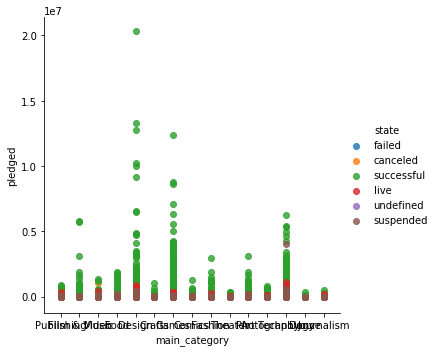

In [65]:
sns.lmplot(x='main_category',y='pledged',data=df,
          fit_reg=False,
          hue='state')

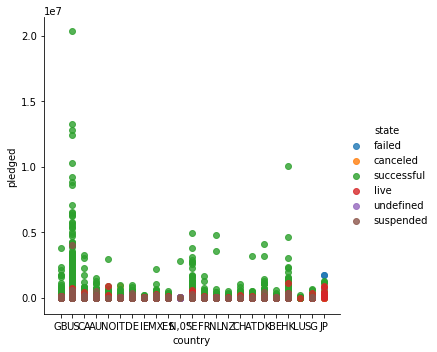

In [61]:
sns.lmplot(x='country',y='pledged',data=df,
          fit_reg=False,
          hue='state')

In [69]:
df['state_new'].groupby(df['country']).mean()

country
AT      1.311558
AU      1.600714
BE      1.562399
CA      1.734210
CH      1.537451
DE      1.502278
DK      1.969452
ES      1.471880
FR      1.860497
GB      2.053665
HK      2.286408
IE      1.610358
IT      1.159833
JP      2.175000
LU      1.725806
MX      1.634132
N,0"    2.965762
NL      1.409693
NO      1.514124
NZ      1.794748
SE      1.742743
SG      2.057658
US      2.088984
Name: state_new, dtype: float64

In [83]:
pd.pivot_table(df,values=['usd_pledged_real','usd_goal_real','backers','state_new'], index=['main_category'])

,backers,state_new,usd_goal_real,usd_pledged_real
main_category,,,,
Art,42.205094,2.233012,39198.575879,3220.986968
Comics,134.771236,2.885757,19571.430669,6610.443828
Crafts,27.283687,1.434556,10434.466228,1632.907282
Dance,42.801221,3.212314,9588.328548,3452.946356
Design,241.299634,2.079381,41871.388591,24417.034698
Fashion,61.447800,1.508240,22412.409361,5712.450839
Film & Video,66.015208,2.101628,82625.292254,6157.978427
Food,54.172466,1.452565,49039.620804,5113.669716
Games,321.785615,2.167551,44923.741408,21041.903140


In [91]:
df.loc[df['state'] == 'successful'].groupby(['main_category']).mean()

,ID,goal,pledged,backers,usd pledged,usd_pledged_real,usd_goal_real,state_new,country_new
main_category,,,,,,,,,
Art,1.079846e+09,4642.114081,7836.474882,90.358123,5420.993262,6971.894850,4410.086374,5.0,0.825022
Comics,1.059403e+09,5693.607838,11902.964118,231.404314,9178.678422,11385.660235,5397.352176,5.0,0.825060
Crafts,1.077424e+09,3539.475650,7022.015139,94.148463,4053.917054,5629.696889,3013.430794,5.0,0.775414
Dance,1.079357e+09,4941.846497,5550.954380,63.396065,4445.787994,5194.016121,4601.094769,5.0,0.893071
Design,1.079661e+09,17869.363175,69272.926059,614.783791,43550.117152,62858.524147,15408.835300,5.0,0.728057
Fashion,1.064358e+09,10527.923923,23219.932871,217.001252,15136.854025,20286.555534,9080.955291,5.0,0.736635
Film & Video,1.072990e+09,11486.109404,14380.737041,152.560428,12409.068566,13951.872429,11145.188408,5.0,0.837404
Food,1.077941e+09,12177.780807,18039.985200,180.557929,14227.414871,17349.390516,11633.962945,5.0,0.879211
Games,1.075683e+09,15280.369228,56018.565317,814.384087,41643.054423,54228.755136,14857.224807,5.0,0.747404


In [94]:
pd.pivot_table(df,values=['ID','state_new'], index=['main_category'])

,ID,state_new
main_category,,
Art,1.077788e+09,2.233012
Comics,1.063611e+09,2.885757
Crafts,1.078527e+09,1.434556
Dance,1.075450e+09,3.212314
Design,1.078300e+09,2.079381
Fashion,1.069690e+09,1.508240
Film & Video,1.074967e+09,2.101628
Food,1.081894e+09,1.452565
Games,1.072129e+09,2.167551


In [103]:
df.groupby(['main_category', 'state']).describe()

ID                                            \
                            count          mean           std           min   
main_category state                                                           
Art           canceled     2222.0  1.097045e+09  6.114186e+08  4.827180e+05   
              failed      14131.0  1.071770e+09  6.198914e+08  5.683300e+04   
              live          194.0  1.147005e+09  6.397819e+08  5.113750e+05   
              successful  11510.0  1.079846e+09  6.241735e+08  2.110900e+04   
              suspended      96.0  1.131164e+09  6.413059e+08  4.831454e+06   
Comics        canceled      842.0  1.084159e+09  6.145088e+08  2.912609e+06   
              failed       4036.0  1.066217e+09  6.187778e+08  5.971000e+03   
              live           76.0  9.723505e+08  6.001889e+08  2.255790e+07   
              successful   5842.0  1.059403e+09  6.173175e+08  3.031870e+05   
              suspended      23.0  1.224591e+09  6.609837e+08  1.049819e+07   
Crafts        canceled      843.0  1.104318e+09  6.007974e+08  2.237262e+06   
              failed       5703.0  1.075722e+09  6.192002e+08  1.166000e+05   
              live           76.0  1.007641e+09  6.066386e+08  1.101412e+06   
              successful   2115.0  1.077424e+09  6.272370e+08  4.425650e+05   
              suspended      72.0  1.105994e+09  6.108536e+08  5.266642e+07   
Dance         canceled      163.0  1.067723e+09  6.436417e+08  1.514696e+07   
              failed       1235.0  1.066526e+09  6.205704e+08  2.855830e+05   
              live           18.0  1.054220e+09  6.971608e+08  6.155512e+07   
              successful   2338.0  1.079357e+09  6.215060e+08  7.870660e+05   
              suspended      13.0  1.298578e+09  6.672989e+08  4.564385e+07   
              undefined       1.0  1.704012e+09           NaN  1.704012e+09   
Design        canceled     4152.0  1.071301e+09  6.133960e+08  6.412920e+05   
              failed      14814.0  1.078069e+09  6.187860e+08  2.779200e+05   
              live          305.0  1.114504e+09  6.001061e+08  2.628314e+07   
              successful  10550.0  1.079661e+09  6.175797e+08  3.264550e+05   
              suspended     247.0  1.104854e+09  6.165114e+08  7.524358e+06   
              undefined       2.0  1.343584e+09  5.282758e+08  9.700362e+08   
Fashion       canceled     2650.0  1.073428e+09  6.173068e+08  2.415758e+06   
              failed      14182.0  1.070605e+09  6.181970e+08  3.386700e+04   
              live          250.0  1.048983e+09  5.767604e+08  1.483117e+06   
...                           ...           ...           ...           ...   
Music         canceled     3305.0  1.077491e+09  6.201773e+08  5.163480e+05   
              failed      21752.0  1.074225e+09  6.182115e+08  1.852000e+04   
              live          281.0  1.097872e+09  6.129762e+08  9.797040e+05   
              successful  24197.0  1.074948e+09  6.195639e+08  5.268700e+04   
              suspended     149.0  1.075541e+09  6.631887e+08  5.606610e+05   
              undefined    2234.0  1.076395e+09  6.099108e+08  9.645580e+05   
Photography   canceled      986.0  1.067815e+09  6.304473e+08  7.311940e+05   
              failed       6384.0  1.071986e+09  6.203902e+08  5.423220e+05   
              live           48.0  1.077304e+09  6.216453e+08  7.541235e+06   
              successful   3305.0  1.071967e+09  6.205900e+08  3.361690e+05   
              suspended      55.0  1.049919e+09  5.871597e+08  3.731571e+07   
              undefined       1.0  1.841517e+09           NaN  1.841517e+09   
Publishing    canceled     3602.0  1.086909e+09  6.172876e+08  7.566260e+05   
              failed      23145.0  1.073605e+09  6.193774e+08  1.897720e+05   
              live          299.0  1.148000e+09  6.121901e+08  1.109305e+07   
              successful  12300.0  1.079333e+09  6.216525e+08  8.937190e+05   
              suspended      66.0  9.935939e+08  6.430602e+08  1.996251e+07   
  

In [117]:
df.groupby(['main_category']).size()

main_category
Art             28153
Comics          10819
Crafts           8809
Dance            3768
Design          30070
Fashion         22816
Film & Video    63585
Food            24602
Games           35231
Journalism       4755
Music           51918
Photography     10779
Publishing      39874
Technology      32569
Theater         10913
dtype: int64

In [118]:
pd.value_counts(df['state'])

failed        197719
successful    133956
canceled       38779
undefined       3562
live            2799
suspended       1846
Name: state, dtype: int64

In [129]:
dfd = df.drop(['ratio', 'country_new'], axis=1)
dfd['profit_ratio'] = df['pledged'] / df['goal']
dfd

,ID,name,category,main_category,currency,deadline,goal,launched,pledged,state,backers,country,usd pledged,usd_pledged_real,usd_goal_real,state_new,profit_ratio
0,1000002330,The Songs of Adelaide & Abullah,Poetry,Publishing,GBP,2015-10-09,1000.0,2015-08-11 12:12:28,0.00,failed,0,GB,0.00,0.00,1533.95,0,0.000000
1,1000003930,Greeting From Earth: ZGAC Arts Capsule For ET,Narrative Film,Film & Video,USD,2017-11-01,30000.0,2017-09-02 04:43:57,2421.00,failed,15,US,100.00,2421.00,30000.00,0,0.080700
2,1000004038,Where is Hank?,Narrative Film,Film & Video,USD,2013-02-26,45000.0,2013-01-12 00:20:50,220.00,failed,3,US,220.00,220.00,45000.00,0,0.004889
3,1000007540,ToshiCapital Rekordz Needs Help to Complete Album,Music,Music,USD,2012-04-16,5000.0,2012-03-17 03:24:11,1.00,failed,1,US,1.00,1.00,5000.00,0,0.000200
4,1000011046,Community Film Project: The Art of Neighborhoo...,Film & Video,Film & Video,USD,2015-08-29,19500.0,2015-07-04 08:35:03,1283.00,canceled,14,US,1283.00,1283.00,19500.00,2,0.065795
5,1000014025,Monarch Espresso Bar,Restaurants,Food,USD,2016-04-01,50000.0,2016-02-26 13:38:27,52375.00,successful,224,US,52375.00,52375.00,50000.00,5,1.047500
6,1000023410,Support Solar Roasted Coffee & Green Energy! ...,Food,Food,USD,2014-12-21,1000.0,2014-12-01 18:30:44,1205.00,successful,16,US,1205.00,1205.00,1000.00,5,1.205000
7,1000030581,Chaser Strips. Our Strips make Shots their B*tch!,Drinks,Food,USD,2016-03-17,25000.0,2016-02-01 20:05:12,453.00,failed,40,US,453.00,453.00,25000.00,0,0.018120
8,1000034518,SPIN - Premium Retractable In-Ear Headphones w...,Product Design,Design,USD,2014-05-29,125000.0,2014-04-24 18:14:43,8233.00,canceled,58,US,8233.00,8233.00,125000.00,2,0.065864
9,100004195,STUDIO IN THE SKY - A Documentary Feature Film...,Documentary,Film & Video,USD,2014-08-10,65000.0,2014-07-11 21:55:48,6240.57,canceled,43,US,6240.57,6240.57,65000.00,2,0.096009


In [131]:
dfd.to_csv('my_ks-projects-201801.csv')